### 3.4. Random Forest y Decision Tree

Realizamos los modelos de Random Forest y Decision Tree y su posterior ajuste de hiperpámetros. 

In [13]:
import pdb
import matplotlib.pyplot as plt
import numpy as np
import pylab
#seleccion de variables ver si merece la pena meterlo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import pandas as pd 

#modelado del machine learning esto meter si o si
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

import seaborn as sns


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot



#para hacer el PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import accuracy_score



import warnings
warnings.filterwarnings('ignore')

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


#PARA HACER EL GRADIENTE DEL ERROR

#Decision Tree Regression with AdaBoost
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate



Creamos funciones que creen  modelos con diferentes rangos que cambian  el valor del parametro que queremos ajustar para hayar el valor del hiperparámetro optimo. 

 Lo realizamos sobre  Random Forest y Decision tree.

In [14]:
#from tune_sklearn import TuneGridSearchCV


def get_models():
    models = dict()
# explore number of features from 1 to 7
    for i in range(1,6):
	    models[str(i)] = RandomForestClassifier(max_features=i)
    return models
def get_models_estimator():
    models = dict()
	# define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
    	models[str(n)] = RandomForestClassifier(n_estimators=n)
    return models

def get_models_depth():
    models = dict()
	# consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,20)] + [None]
    for n in depths:
    	models[str(n)] = RandomForestClassifier(max_depth=n)
    return models


def get_models_DT():
    models = dict()
# explore number of features from 1 to 7
    for i in range(1,15):
	    models[str(i)] = DecisionTreeClassifier(max_features=i)
    return models

In [15]:
def get_models_depth_DT():
    models = dict()
	# consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,20)] + [None]
    for n in depths:
    	models[str(n)] = DecisionTreeClassifier(max_depth=n)
    return models


 En la función evaluar_hiperparametros_modelo, aplicamos las funciones anteriores y optenemos una lista de modelos sobre los cuales aplicamos la validacion crizada con diferentes valores para  un único hiperpárametro. 

De la cual optenemos un box plot de cada modelo en función a los resultados obtenido de los resultados de la validación cruzada. 


In [16]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	return scores
def evaluar_hiperparametros_modelo(models,X,y):
    results, names = list(), list()
    for name, model in models.items():
        # evaluate the model
        scores = evaluate_model(model, X, y)
        # store the results
        results.append(scores)
        names.append(name)
        # summarize the performance along the way
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.show()


In [17]:
datos=pd.read_csv('./CSV/csv_precio_div.csv')


features=['Rooms','Distance','Bathroom','Landsize','Lattitude','Longtitude']
X=datos[features] 
y=datos['precio_div']

scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)


#### 3.4.1 Ajuste de hiperparámetros  de Random Fores y Decision Tree.

Imprimimos por pantalla los resultados de los box plot de cada uno de los hiperparametros y obtenemos cual es el que ajusta el modelo con un mejor resultado. 

Elegimos los mejores hiperparámetros para estos dos modelos.

>1 0.956 (0.003)
>2 0.956 (0.003)
>3 0.955 (0.003)
>4 0.954 (0.003)
>5 0.953 (0.003)


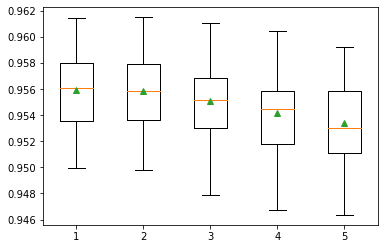

>1 0.840 (0.006)
>2 0.844 (0.007)
>3 0.844 (0.006)
>4 0.847 (0.006)
>5 0.846 (0.007)
>6 0.845 (0.006)
>7 nan (nan)
>8 nan (nan)
>9 nan (nan)
>10 nan (nan)
>11 nan (nan)
>12 nan (nan)
>13 nan (nan)
>14 nan (nan)


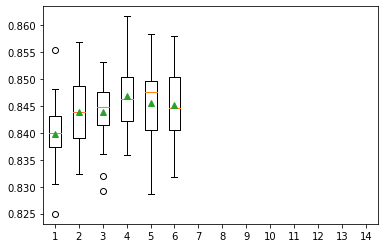

>10 0.944 (0.003)
>50 0.954 (0.003)
>100 0.956 (0.003)
>500 0.957 (0.003)
>1000 0.957 (0.003)


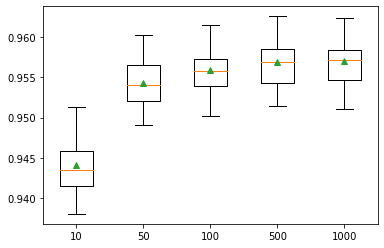

>1 0.812 (0.011)
>2 0.851 (0.007)
>3 0.877 (0.006)
>4 0.891 (0.006)
>5 0.902 (0.005)
>6 0.913 (0.005)
>7 0.923 (0.004)
>8 0.931 (0.004)
>9 0.937 (0.004)
>10 0.942 (0.004)
>11 0.946 (0.004)
>12 0.949 (0.003)
>13 0.951 (0.004)
>14 0.953 (0.003)
>15 0.954 (0.003)
>16 0.955 (0.003)
>17 0.955 (0.003)
>18 0.956 (0.003)
>19 0.956 (0.003)
>None 0.956 (0.003)


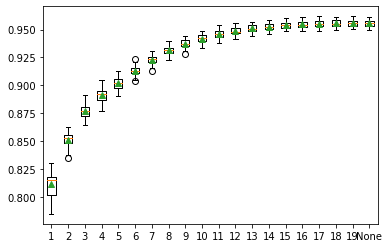

In [11]:

models = get_models()
evaluar_hiperparametros_modelo(models,X,y)

models = get_models_DT()
evaluar_hiperparametros_modelo(models,X,y)
  

models =get_models_estimator()
evaluar_hiperparametros_modelo(models,X,y)


models =get_models_depth()
evaluar_hiperparametros_modelo(models,X,y)



Calculamos los hiperparámetros también atraves de GrindseachCSV.

In [19]:
#otro tipo de cálculo de hiperparámetros a partir de gridsearchcvf
param_grid= {'criterion': ['gini', 'entropy'],'max_depth': [None, 1 , 3, 5, 10],'min_samples_split': [5,10],'min_samples_leaf':[5,10]}

gs_rf=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
gs_rf.fit(X_train,y_train)
y_pred=gs_rf.predict(X)

param_grid= {'criterion': ['gini', 'entropy'],'max_depth': [None, 3 , 5, 10, 20],'min_samples_split': [5,10],'min_samples_leaf':[5,10]}

gs_rf=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)
gs_rf.fit(X_train,y_train)
y_pred=gs_rf.predict(X)

Con la combinación de ambas formas de ajuste de hiperparámetros usaremos para la la evaluación del modelo y seleccionar el mejor. 